In [1]:
import numpy as np
import henon_map_cpp as hm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
def tangent_map(x, px, y, py, tune_x=0.168, tune_y=0.201, mu=0.0):
    cx = np.cos(tune_x) * np.ones_like(x)
    sx = np.sin(tune_x) * np.ones_like(x)
    cy = np.cos(tune_y) * np.ones_like(x)
    sy = np.sin(tune_y) * np.ones_like(x)
    a1 = np.array([
        cx + sx * (2 * x + mu * 3 * x * x - mu * 3 * y * y),
        sx,
        sx * (- 2 * y - mu * 6 * x * y),
        np.zeros_like(x),
    ])
    a2 = np.array([
        - sx + cx * (2 * x + mu * 3 * x * x - mu * 3 * y * y),
        cx,
        cx * (- 2 * y - mu * 6 * x * y),
        np.zeros_like(x),
    ])
    a3 = np.array([
        sy * (- 2 * y - mu * 6 * x * y),
        np.zeros_like(x),
        cy + sy * (- 2 * x - mu * 3 * x * x + mu * 3 * y * y),
        sy,
    ])
    a4 = np.array([
        cy * (- 2 * y - mu * 6 * x * y),
        np.zeros_like(x),
        -sy + cy * (- 2 * x - mu * 3 * x * x + mu * 3 * y * y),
        cy,
    ])
    return np.transpose(np.array([a1, a2, a3, a4]), (2, 0, 1))
    


In [2]:
x = np.linspace(0, 1.0, 100)
xx, yy = np.meshgrid(x, x)
xx = xx.flatten()
yy = yy.flatten()

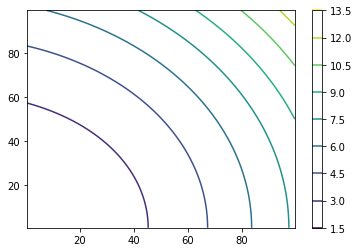

In [4]:
A = tangent_map(xx, np.zeros_like(xx), yy, np.zeros_like(xx), mu=1.1)

tr = np.trace(np.matmul(np.transpose(A, (0, 2, 1)), A), axis1=1, axis2=2)

plt.contour(np.sqrt(tr).reshape(100, 100), origin="lower")
plt.colorbar()

In [12]:
x = np.linspace(0, 0.7, 200)
xx, yy = np.meshgrid(x, x)

nsteps = 20024

engine = hm.henon_tracker(
    xx.flatten(), np.zeros_like(xx.flatten()), yy.flatten(
    ), np.zeros_like(yy.flatten()), force_CPU=True
)
engine.compute_a_modulation(nsteps, 0.168, 0.201, 16.0, "sps")

CUDA devices available: 4


In [13]:
tm = engine.track_tangent_map([nsteps], 0.0)
tm

array([[1.59077411, 1.59079648, 1.59083131, ...,        nan,        nan,
               nan]])

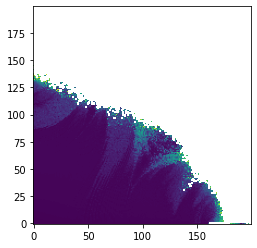

In [15]:
plt.imshow(np.log10(np.sqrt(tm)).reshape(200, 200), origin="lower")

In [10]:
x = np.linspace(0, 1.0, 100)
xx, yy = np.meshgrid(x, x)

nsteps = 2024

engine = hm.henon_tracker(
    xx.flatten(), np.zeros_like(xx.flatten()), yy.flatten(
    ), np.zeros_like(yy.flatten())
)
engine.compute_a_modulation(nsteps, 0.168, 0.201, 16.0, "sps")

A = tangent_map(engine.get_x(), engine.get_px(), engine.get_y(), engine.get_py(), mu=0.1)

for i in tqdm(range(nsteps)):
    engine.track(1, 0.0)
    A = np.matmul(
        tangent_map(engine.get_x(), engine.get_px(), engine.get_y(), engine.get_py(), mu=0.0), A
    )

tr = np.sqrt(np.trace(np.matmul(np.transpose(A, (0, 2, 1)), A), axis1=1, axis2=2))



  0%|          | 0/2024 [00:00<?, ?it/s]

In [11]:
engine.get_x()


array([0.        , 0.00864176, 0.01084105, ...,        nan,        nan,
              nan])

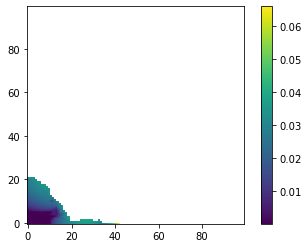

In [12]:

plt.imshow((np.log10(tr)/nsteps).reshape(100, 100), origin="lower")
plt.colorbar()


In [7]:
engine = hm.henon_tracker(
    xx.flatten(), np.zeros_like(xx.flatten()), yy.flatten(), np.zeros_like(yy.flatten()), 0.168, 0.201
)

TypeError: __init__() takes from 5 to 6 positional arguments but 7 were given

In [ ]:
engine.track(1021, 16.0, 0.1)

In [ ]:
engine.track(1021, 16.0, 0.1, inverse=True)

/tmp/ipykernel_31216/3699846105.py:2: RuntimeWarning: divide by zero encountered in log10
  np.log10(


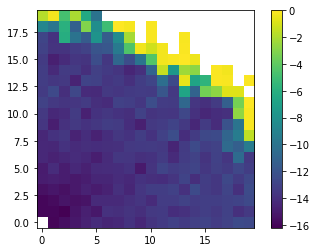

In [ ]:
plt.imshow(
    np.log10(
        np.sqrt(
            np.power((xx.flatten() - engine.get_x()), 2) +
            np.power((yy.flatten() - engine.get_y()), 2) +
            np.power((engine.get_px()), 2) +
            np.power((engine.get_py()), 2)
        ).reshape(xx.shape)),
    origin="lower",
)
plt.colorbar()

In [ ]:
samples = np.arange(10000)
data = []
for sample in tqdm(samples):
    engine = hm.henon_tracker(
        xx.flatten(), np.zeros_like(xx.flatten()), yy.flatten(
        ), np.zeros_like(yy.flatten()), 0.168, 0.201
    )
    engine.track(sample+1, 16.0, 0.1)
    engine.track(sample+1, 16.0, 0.1, inverse=True)
    data.append(
        np.sqrt(
            np.power((xx.flatten() - engine.get_x()), 2) +
            np.power((yy.flatten() - engine.get_y()), 2) +
            np.power((engine.get_px()), 2) +
            np.power((engine.get_py()), 2)
        ))
data = np.asarray(data)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
data.shape

(10000, 100)

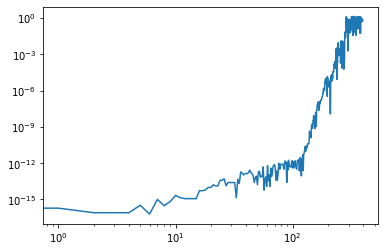

In [ ]:
plt.plot(data[:,np.random.randint(0, 100)])
plt.yscale("log")
plt.xscale("log")


In [1]:
import numpy as np
import henon_map_cpp as hm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

x = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, x)
xx = xx.flatten()

engine = hm.henon_tracker(
    xx.flatten(), np.zeros_like(xx.flatten()), yy.flatten(), np.zeros_like(yy.flatten()))

steps = 2048

engine.compute_a_modulation(steps, 0.168, 0.201, 64.0, "sps")

tunes = engine.fft_tunes(
    steps, 0.0, from_idx=np.array([0, 128, 0, 256]), to_idx=np.array([127, 255, 255, 511])
)


Starting threads...
Returning results...


In [11]:
engine.reset()
tunes_2 = engine.birkhoff_tunes(
    steps, 0.0, from_idx=np.array([0, 128, 0, 256]), to_idx=np.array([127, 255, 255, 511])
)

Starting threads...
Returning results...


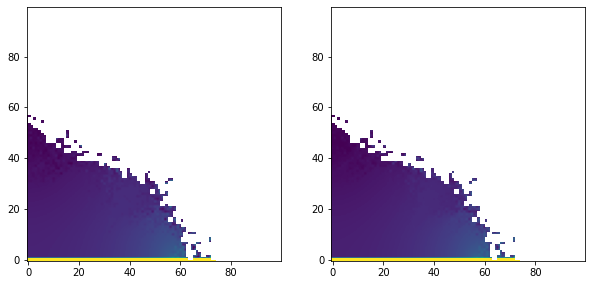

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tunes.iloc[-1]["tune_y"].reshape(100, 100),
           origin="lower", vmax=0.3)
axs[1].imshow(tunes_2.iloc[-1]["tune_y"].reshape(100, 100),
           origin="lower", vmax=0.3)


/tmp/ipykernel_111577/4145038652.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.absolute((tunes.iloc[2]["tune_y"] - tunes.iloc[3]["tune_y"]))).reshape(100, 100),


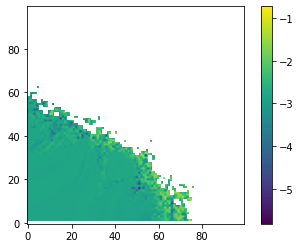

In [10]:
plt.imshow(np.log10(np.absolute((tunes.iloc[2]["tune_y"] - tunes.iloc[3]["tune_y"]))).reshape(100, 100),
           origin="lower")
plt.colorbar()


In [2]:
x = np.linspace(0, 1, 500)
xx, yy = np.meshgrid(x, x)
xx = xx.flatten()

engine = hm.henon_tracker(
    xx.flatten(), np.zeros_like(xx.flatten()), yy.flatten(), np.zeros_like(yy.flatten()))

In [3]:
steps = 2048

engine.compute_a_modulation(steps, 0.168, 0.201, 64.0, "sps")

In [15]:
engine.reset()
engine.track(steps, 0.0, 10.0)
engine.track(steps, 0.0, 10.0, inverse=True)


In [16]:
engine.get_x()

array([0.        , 0.00200401, 0.00400802, ...,        nan,        nan,
              nan])

In [17]:
displacement = np.sqrt(
    np.power((xx.flatten() - engine.get_x()), 2) +
    np.power((yy.flatten() - engine.get_y()), 2) +
    np.power((engine.get_px()), 2) +
    np.power((engine.get_py()), 2)
)

/tmp/ipykernel_93937/2323192727.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(displacement.reshape(500, 500)), origin="lower")


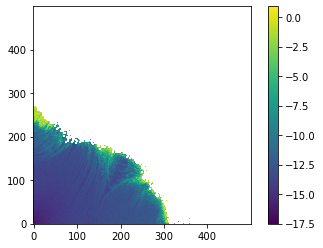

In [18]:
plt.imshow(np.log10(displacement.reshape(500, 500)), origin="lower")
plt.colorbar()

/tmp/ipykernel_93937/2192250866.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(engine.get_steps()).reshape(500, 500), origin="lower")


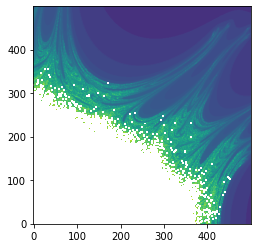

In [19]:
plt.imshow(np.log10(engine.get_steps()).reshape(500, 500), origin="lower")

In [4]:
tunes = engine.fft_tunes(
    steps, 0.0, from_idx=np.array([0, 128, 0, 256]), to_idx=np.array([127, 255, 255, 511])
)

Starting threads...
Returning results...


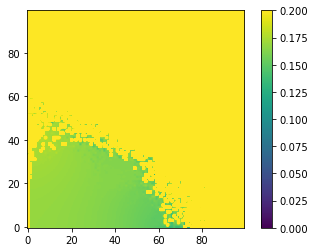

In [4]:
plt.imshow(tunes.iloc[-1]["tune_x"].reshape(100, 100), origin="lower", vmin=0.0, vmax=0.2)
plt.colorbar()

(array([8.7808e+04, 0.0000e+00, 6.0000e+00, 1.7000e+01, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 4.5000e+01,
        1.7000e+01, 4.0000e+00, 2.4000e+01, 6.0000e+01, 1.1300e+02,
        7.6000e+01, 6.3000e+01, 9.1000e+01, 6.7000e+01, 2.0600e+02,
        1.3100e+02, 8.6000e+01, 5.0000e+01, 3.3000e+01, 1.0000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 2.00

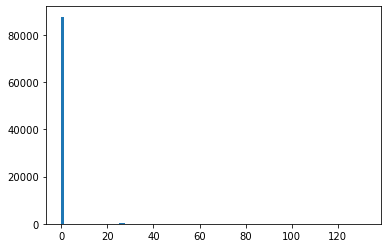

In [10]:
plt.hist(tunes.iloc[2]["tune_x"], bins=100)


In [12]:
tunes

,from,to,tune_x,tune_y
0,0,127,"[0.0, 0.9971363803183941, 0.9971357734002856, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,128,255,"[0.0, 0.995588369295085, 0.9955877510699838, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,255,"[0.0, 0.9962713158921217, 0.9962707074753564, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,256,511,"[0.0, 0.9989482676768405, 0.9989476613879663, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0,2048,"[0.0, 0.9995733319203371, 0.9995728789252237, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
s

In [22]:
import numpy as np
import henon_map_cpp as hm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

x = np.linspace(-1, 1, 500)
xx, yy = np.meshgrid(x, x)
xx = xx.flatten()

engine = hm.henon_tracker(
    xx.flatten(),  yy.flatten(), np.zeros_like(xx.flatten()), np.zeros_like(yy.flatten()))

steps = 2048

engine.compute_a_modulation(steps, 0.3, 0.221, 64.0, "sps")




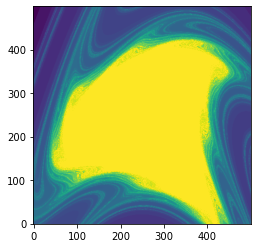

In [23]:
engine.reset()
tunes = engine.track(
    steps, 0.0
)
stable_steps = engine.get_steps()
plt.imshow(np.log10(stable_steps).reshape(500, 500), origin="lower")


In [26]:
import numpy as np
import henon_map_cpp as hm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

x = np.linspace(-1, 1, 500)
xx, yy = np.meshgrid(x, x)
xx = xx.flatten()

engine = hm.henon_tracker(
    np.zeros_like(xx.flatten()), np.zeros_like(yy.flatten()), xx.flatten(),  yy.flatten())

steps = 2048

engine.compute_a_modulation(steps, 0.3, 0.221, 64.0, "sps")




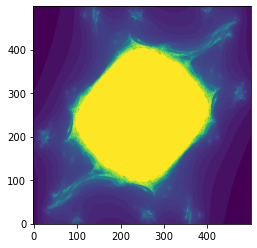

In [27]:
engine.reset()
tunes = engine.track(
    steps, 0.0
)
stable_steps = engine.get_steps()
plt.imshow(np.log10(stable_steps).reshape(500, 500), origin="lower")


/tmp/ipykernel_111577/2654106164.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.absolute(chaos_steps - stable_steps)).reshape(500, 500), origin="lower")


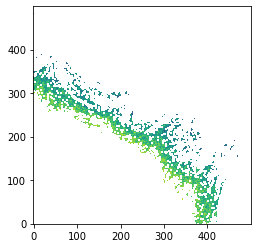

In [30]:
plt.imshow(np.log10(np.absolute(chaos_steps - stable_steps)).reshape(500, 500), origin="lower")

In [1]:
import numpy as np
import henon_map_cpp as hm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

x = np.linspace(0, 1, 200)
xx, yy = np.meshgrid(x, x)
xx = xx.flatten()
yy = yy.flatten()
xx = np.concatenate((xx, xx+1e-8))
yy = np.concatenate((yy, yy))

engine = hm.henon_tracker(
    xx.flatten(), np.zeros_like(xx.flatten()), yy.flatten(), np.zeros_like(yy.flatten()))

steps = 2048

engine.compute_a_modulation(steps, 0.168, 0.201, 64.0, "sps")




In [2]:
megno = engine.track_MEGNO([3,steps], 0.0)

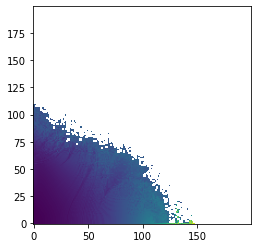

In [5]:
plt.imshow(megno[1].reshape(200, 200), origin="lower")

In [4]:
megno[0][0:10]


array([0.33333333, 0.33251842, 0.33173789, 0.33099267, 0.33028371,
       0.32961193, 0.32897827, 0.32838361, 0.32782885, 0.32731483])